In [50]:
import numpy as np 
import pandas as pd 
from optim import *
from matplotlib import pyplot as plt

# Overview

This note does a few things. First, it just looks at expected values by scenario. At reasonable values for parameters, take-up is not ok. But that is fine. In estimation, things get much better. Just wanted to show that we are were we were with the Python code. Also it is important to note that this is with $n=1$. Things are slow, but I wanted to show this before I move to approximations with $n>1$. 

The main innovation below is to show simulated paths from the decision rules. It works really well! 

# Check Expected Value by Scenario and Take-up

For each respondent and scenario we compute the expected value. We then look at the utility gain from purchasing each 12 products offered. We also look at optimal take up. 

I mostly wanted to do checks, so I used what would likely be sensible parameter values. Preferences for this exercise are given by 

``` python
varepsilon= 4.0, d_varepsilon=1.0, gamma = 0.5, d_gamma=1.5, rho = 0.7, b_x = 0.0, d_b_x = 5.0, b_k = 110.7,
nu_c0 = 1.0, nu_c1 = 0.5, nu_c2 = 0.32, nu_h0 = 1.0, nu_h1 = 0.3, d_nu_h = 0.5, beta = 0.97
```

For a reason I explain below, I turn off lines of credit from these simulations. 

In [51]:
df = pd.read_csv('output/values_ref.csv')
pd.set_option('display.max_rows', 500)

In [52]:
for i in range(1,13):
	df['d_value_'+str(i)] = df['value_'+str(i)] - df['value_0']

In [53]:
for i in range(1,13):
	df['buy_'+str(i)] = df['d_value_'+str(i)]>0

<AxesSubplot:>

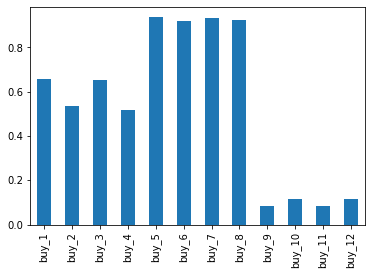

In [54]:
df[['buy_'+str(i) for i in range(1,13)]].mean().plot.bar()

Take up is a bit high for these parameters for annuities. Quite a bit high for LTCI. But it is low for RMR. So preferences need to be better to fit this. If we use the very different values from estimation, it does look much better. But I am getting a very large bequest motive. I want to understand this better, but as I show below, there is a lot of progress. 

# Simulated Profiles

For each respondent, we simulate once the outcomes using decision rules computed optimally. We do this from their current age to a maximum of 40 periods. We use n=1. We then investigate how these profiles evolve across various groups. 

In [55]:
df = pd.read_csv('output/simulated_ref.csv')

In [56]:
df['qinc'] = pd.qcut(df['totinc'],q=4)
df['qhome'] = pd.qcut(df['home_value'],q=4)
df['qwlth'] = pd.qcut(df['wealth_total'],q=4)
df['qmu'] = pd.qcut(df['mu'],q=3)
df['qxi'] = pd.qcut(df['xi'],q=3)
for a in np.arange(40):
	df['surv_'+str(a)] = np.where(~df['cons_'+str(a)].isna(),1,0)

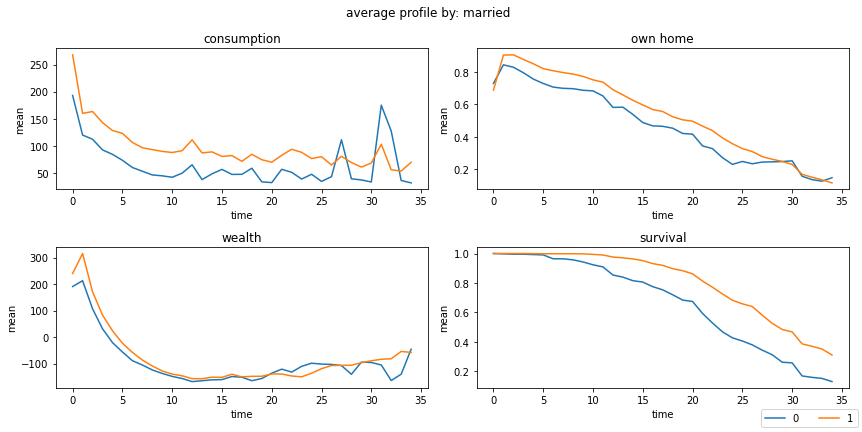

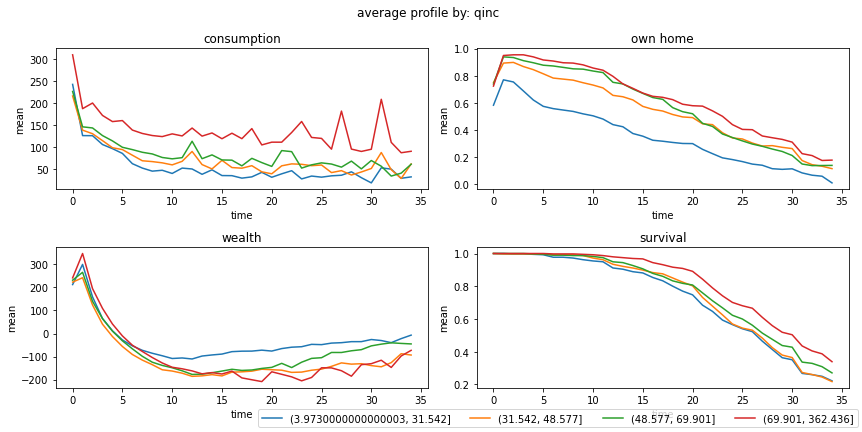

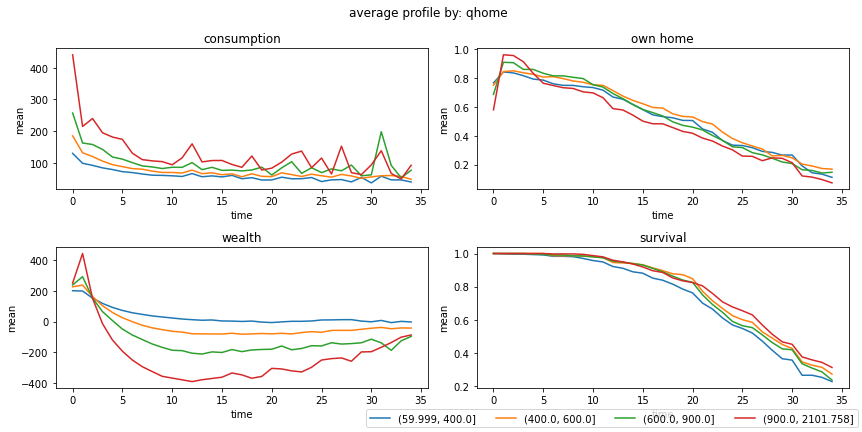

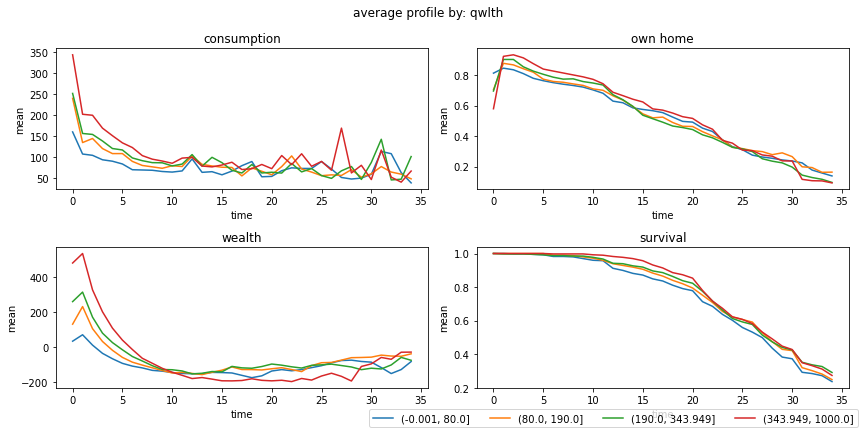

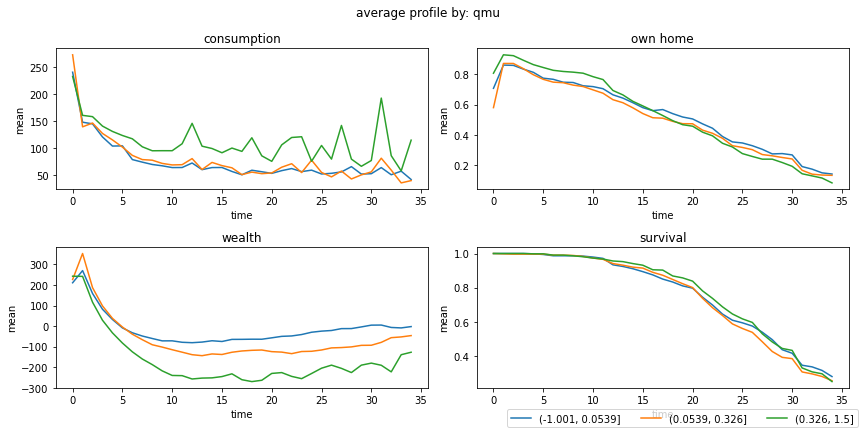

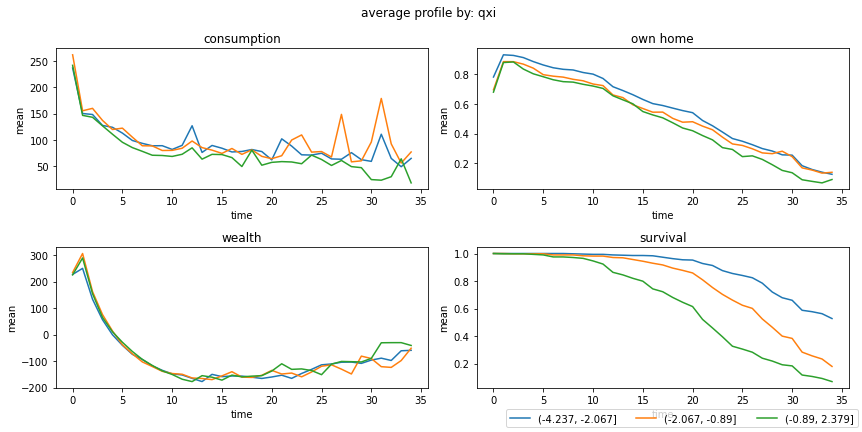

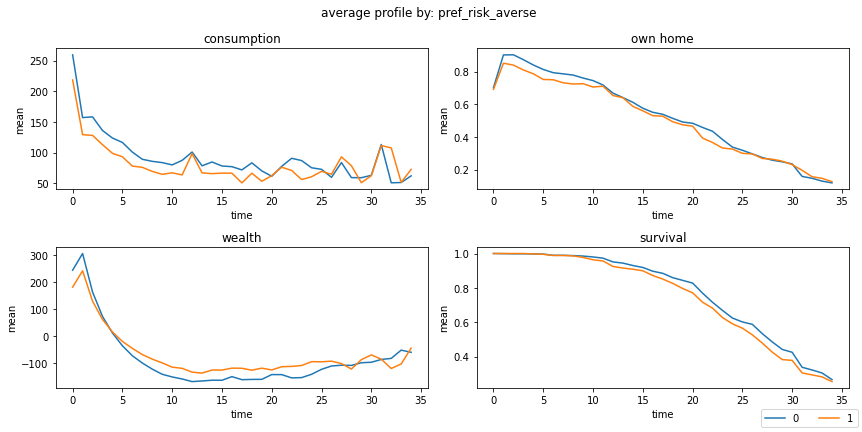

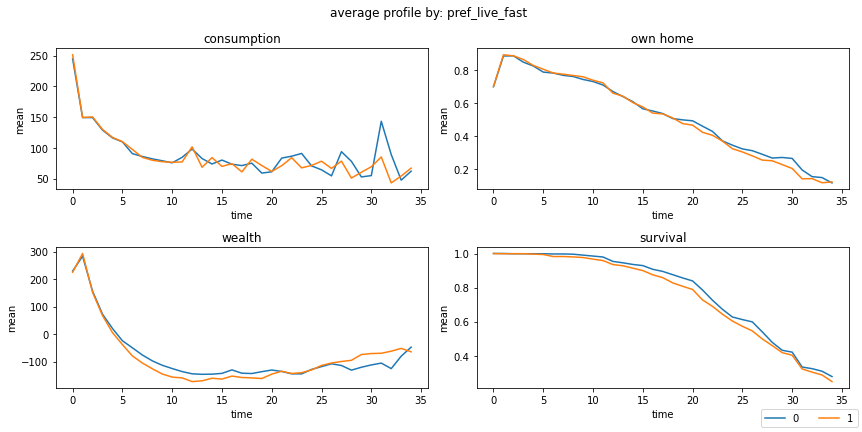

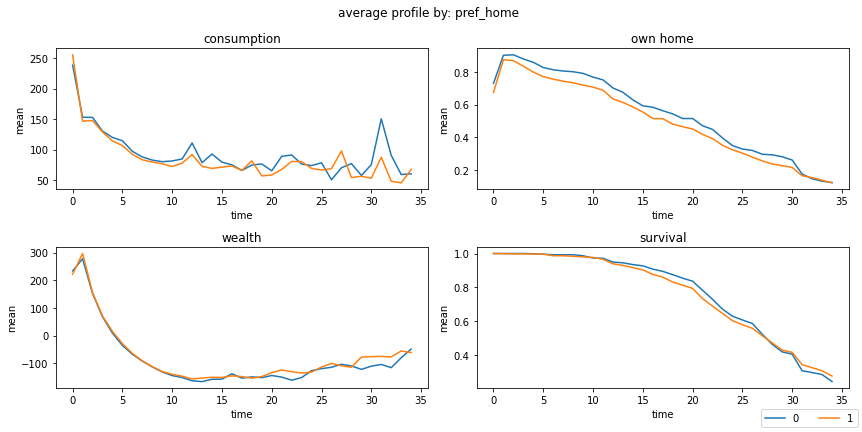

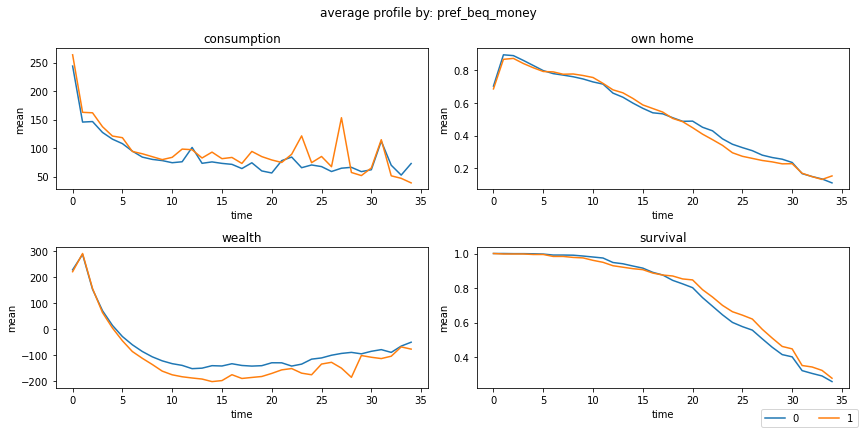

In [57]:
vars_list = ['married','qinc','qhome','qwlth','qmu','qxi','pref_risk_averse','pref_live_fast','pref_home','pref_beq_money']
cut_time = 35
for v in vars_list:
	if v in df.columns:
		fig, ax = plt.subplots(2,2,figsize=(12, 6))
		dv = df[['cons_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,0].plot(dv.index,dv[c],label=c)
		ax[0,0].set_title('consumption')
		dv = df[['own_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,1].plot(dv.index,dv[c],label=c)
		ax[0,1].set_title('own home')
		dv = df[['wlth_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,0].plot(dv.index,dv[c],label=c)
		ax[1,0].set_title('wealth')
		dv = df[['surv_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,1].plot(dv.index,dv[c],label=c)
		ax[1,1].set_title('survival')
		fig.suptitle('average profile by: '+v)
		lines_labels = fig.axes[0].get_legend_handles_labels()
		fig.legend(lines_labels[0], lines_labels[1],ncol=4,loc="lower right")
		for a in ax.flat:
			a.set(xlabel='time', ylabel='mean')
		plt.tight_layout() 
		fig.show()

# Next Steps

* investigate desirability of lines of credit (there is a ramp up if we allow for it)
* relaunch estimation (starting values are an issue)